# Bibliotecas

In [69]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

# Funções



In [103]:
def treat_outliers(feature):
    median_ = feature.median()
    q1, q3 = np.quantile(feature, [.25, .75])
    iqr = q3 - q1
    is_outlier = (feature < (q1 - 1.5*iqr)) | (feature > (q3 + 1.5*iqr))
    return np.where(is_outlier, median_, feature)


# Configurações de ambiente

In [70]:
# Configuração das variáveis de ambiente
load_dotenv()
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

In [71]:
# Download do dataset através da api do kaggle
#!kaggle datasets download -d uciml/breast-cancer-wisconsin-data -p ../data/

# Extrair o arquivo zip
#!cd ../data && unzip breast-cancer-wisconsin-data.zip -d ../data/

# 1. Ingestão dos dados

In [72]:
df_raw = pd.read_csv('../data/data.csv')
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [73]:
# Remove coluna Unnamed: 32 and id column
df_raw = df_raw.iloc[:,:-1].drop(columns='id')

# 2. Entendimento dos dados

In [74]:
# Verifica o data type das variáveis
df_raw.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [75]:
# Verifica informações do dataset
df_raw.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [76]:
# Verifica as estatísticas básicas do dataset
df_raw.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [77]:
# Verifica a existência de dados faltantes
df_raw.isna().sum().sum()

0

In [78]:
# Verifica a existência de linhas duplicadas
df_raw.duplicated().sum()

0

In [91]:
# Verificar a proporção das classes
df_raw['diagnosis'].value_counts(normalize=True) * 100

diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64

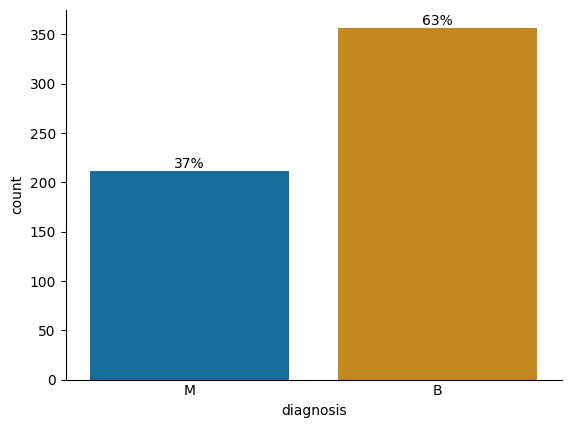

In [96]:
# Gráfico da proporção das classes
fig, ax = plt.subplots()
sns.countplot(data=df_raw, x='diagnosis', hue='diagnosis', palette='colorblind')
heights = df_raw['diagnosis'].value_counts().sort_values()
for i, height in enumerate(heights):
    ax.text(i, height, f'{height/df_raw.shape[0]:.0%}', ha='center', va='bottom')
    ax.tick_params(axis='x', which='both', length=0)
sns.despine()

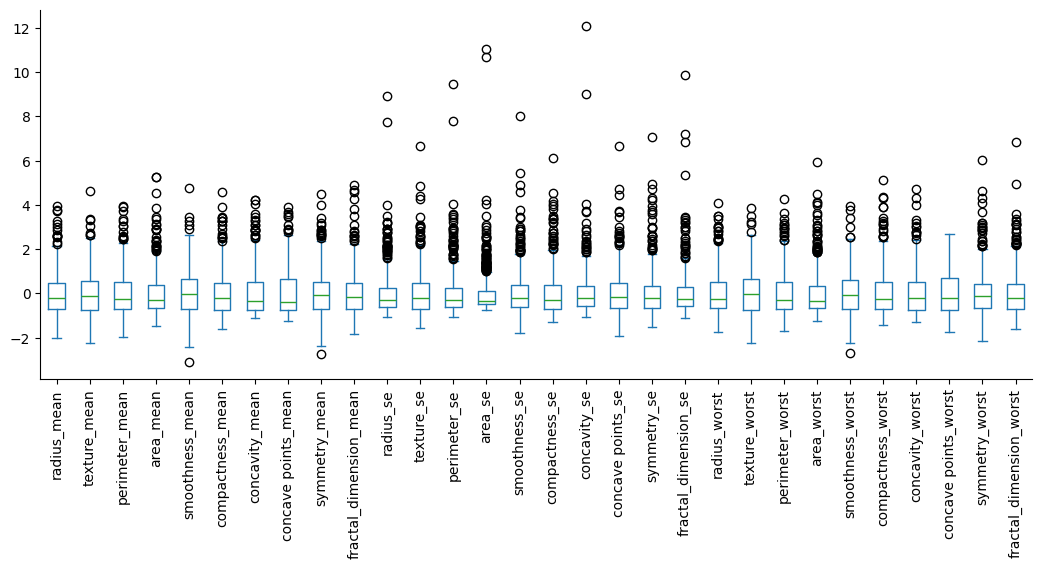

In [79]:
# Verifica a existência de outliers (método IQR)
num_cols = df_raw.select_dtypes('number').columns  # Seleciona as colunas numéricas
fig, ax = plt.subplots(figsize=(6.4*2, 4.8))
df_raw[num_cols].apply(scale).plot.box(ax=ax)
plt.xticks(rotation=90)
sns.despine();

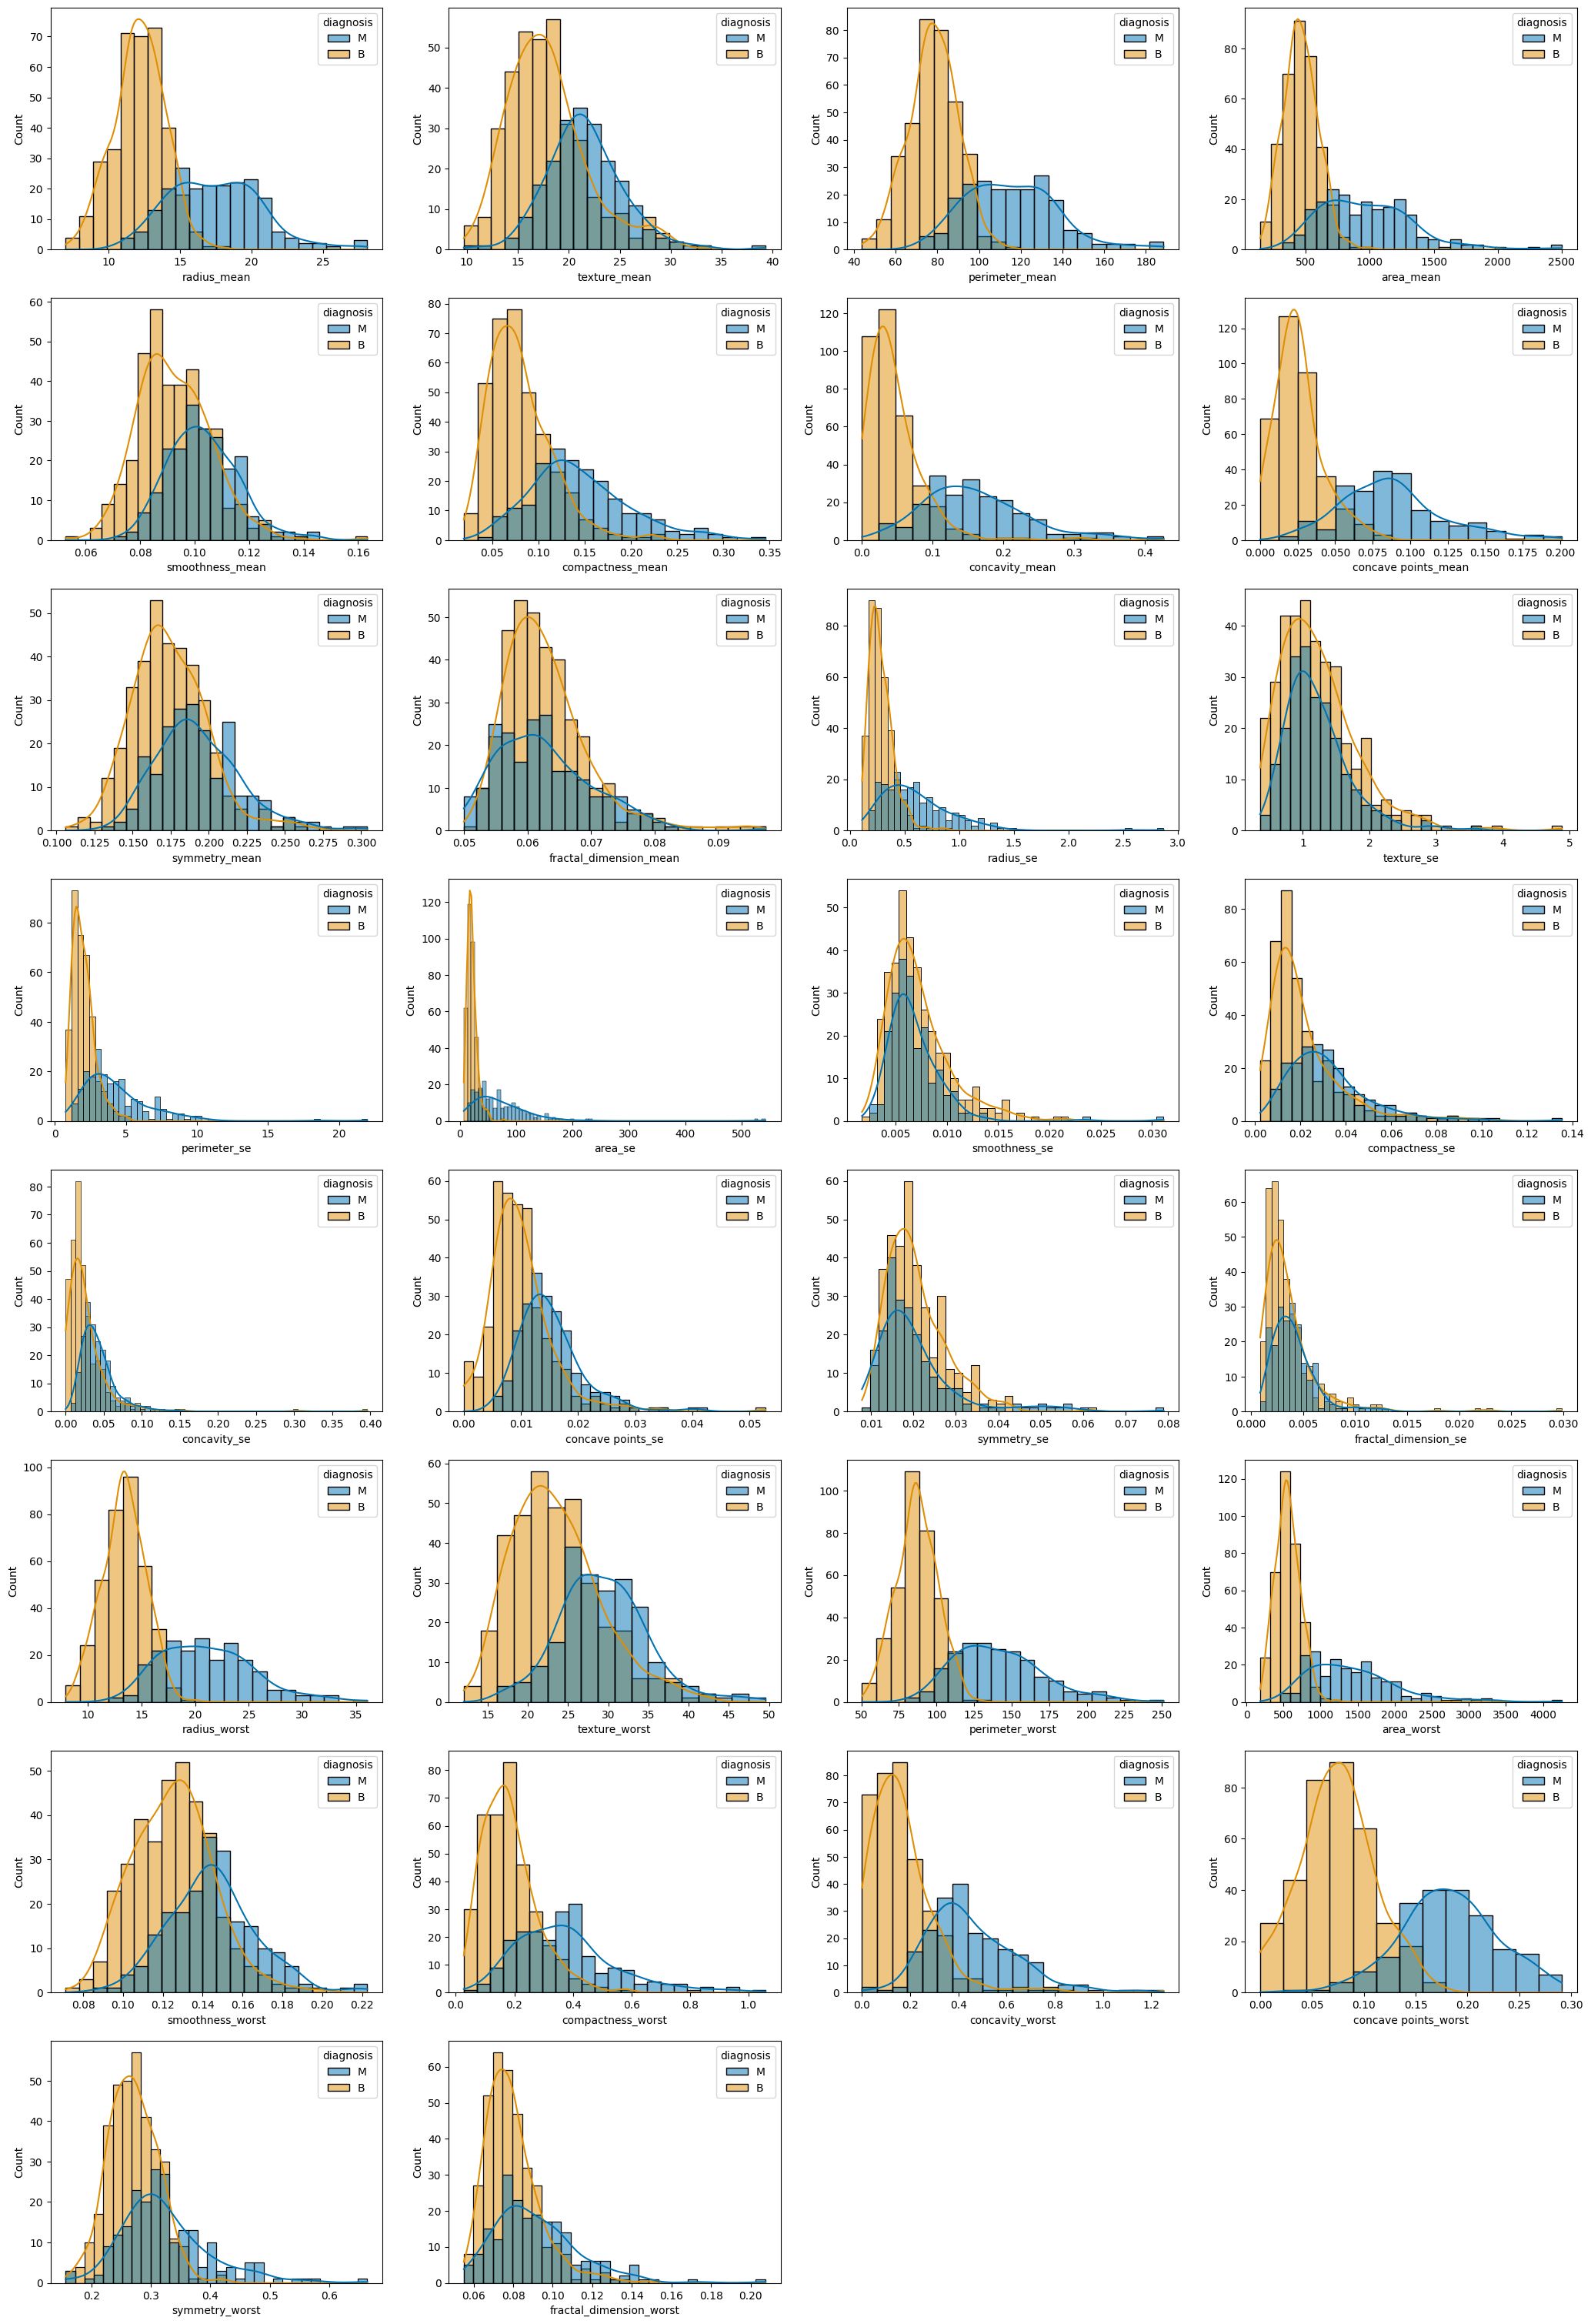

In [87]:
# Verificação da distribuição das variáveis numéricas em relação às classes
ncols = 4
nrows = int(np.ceil(len(num_cols) / ncols)) 
fig, axes = plt.subplots(figsize=(6.4*ncols, 4.8*nrows),
                         nrows=nrows, ncols=ncols)
axes = axes.flatten()
for col, ax in zip(num_cols, axes):
    sns.histplot(data=df_raw, x=col, ax=ax, hue='diagnosis', kde=True,
                 palette='colorblind')
    for ax in axes[len(num_cols):]:
        ax.set_axis_off()

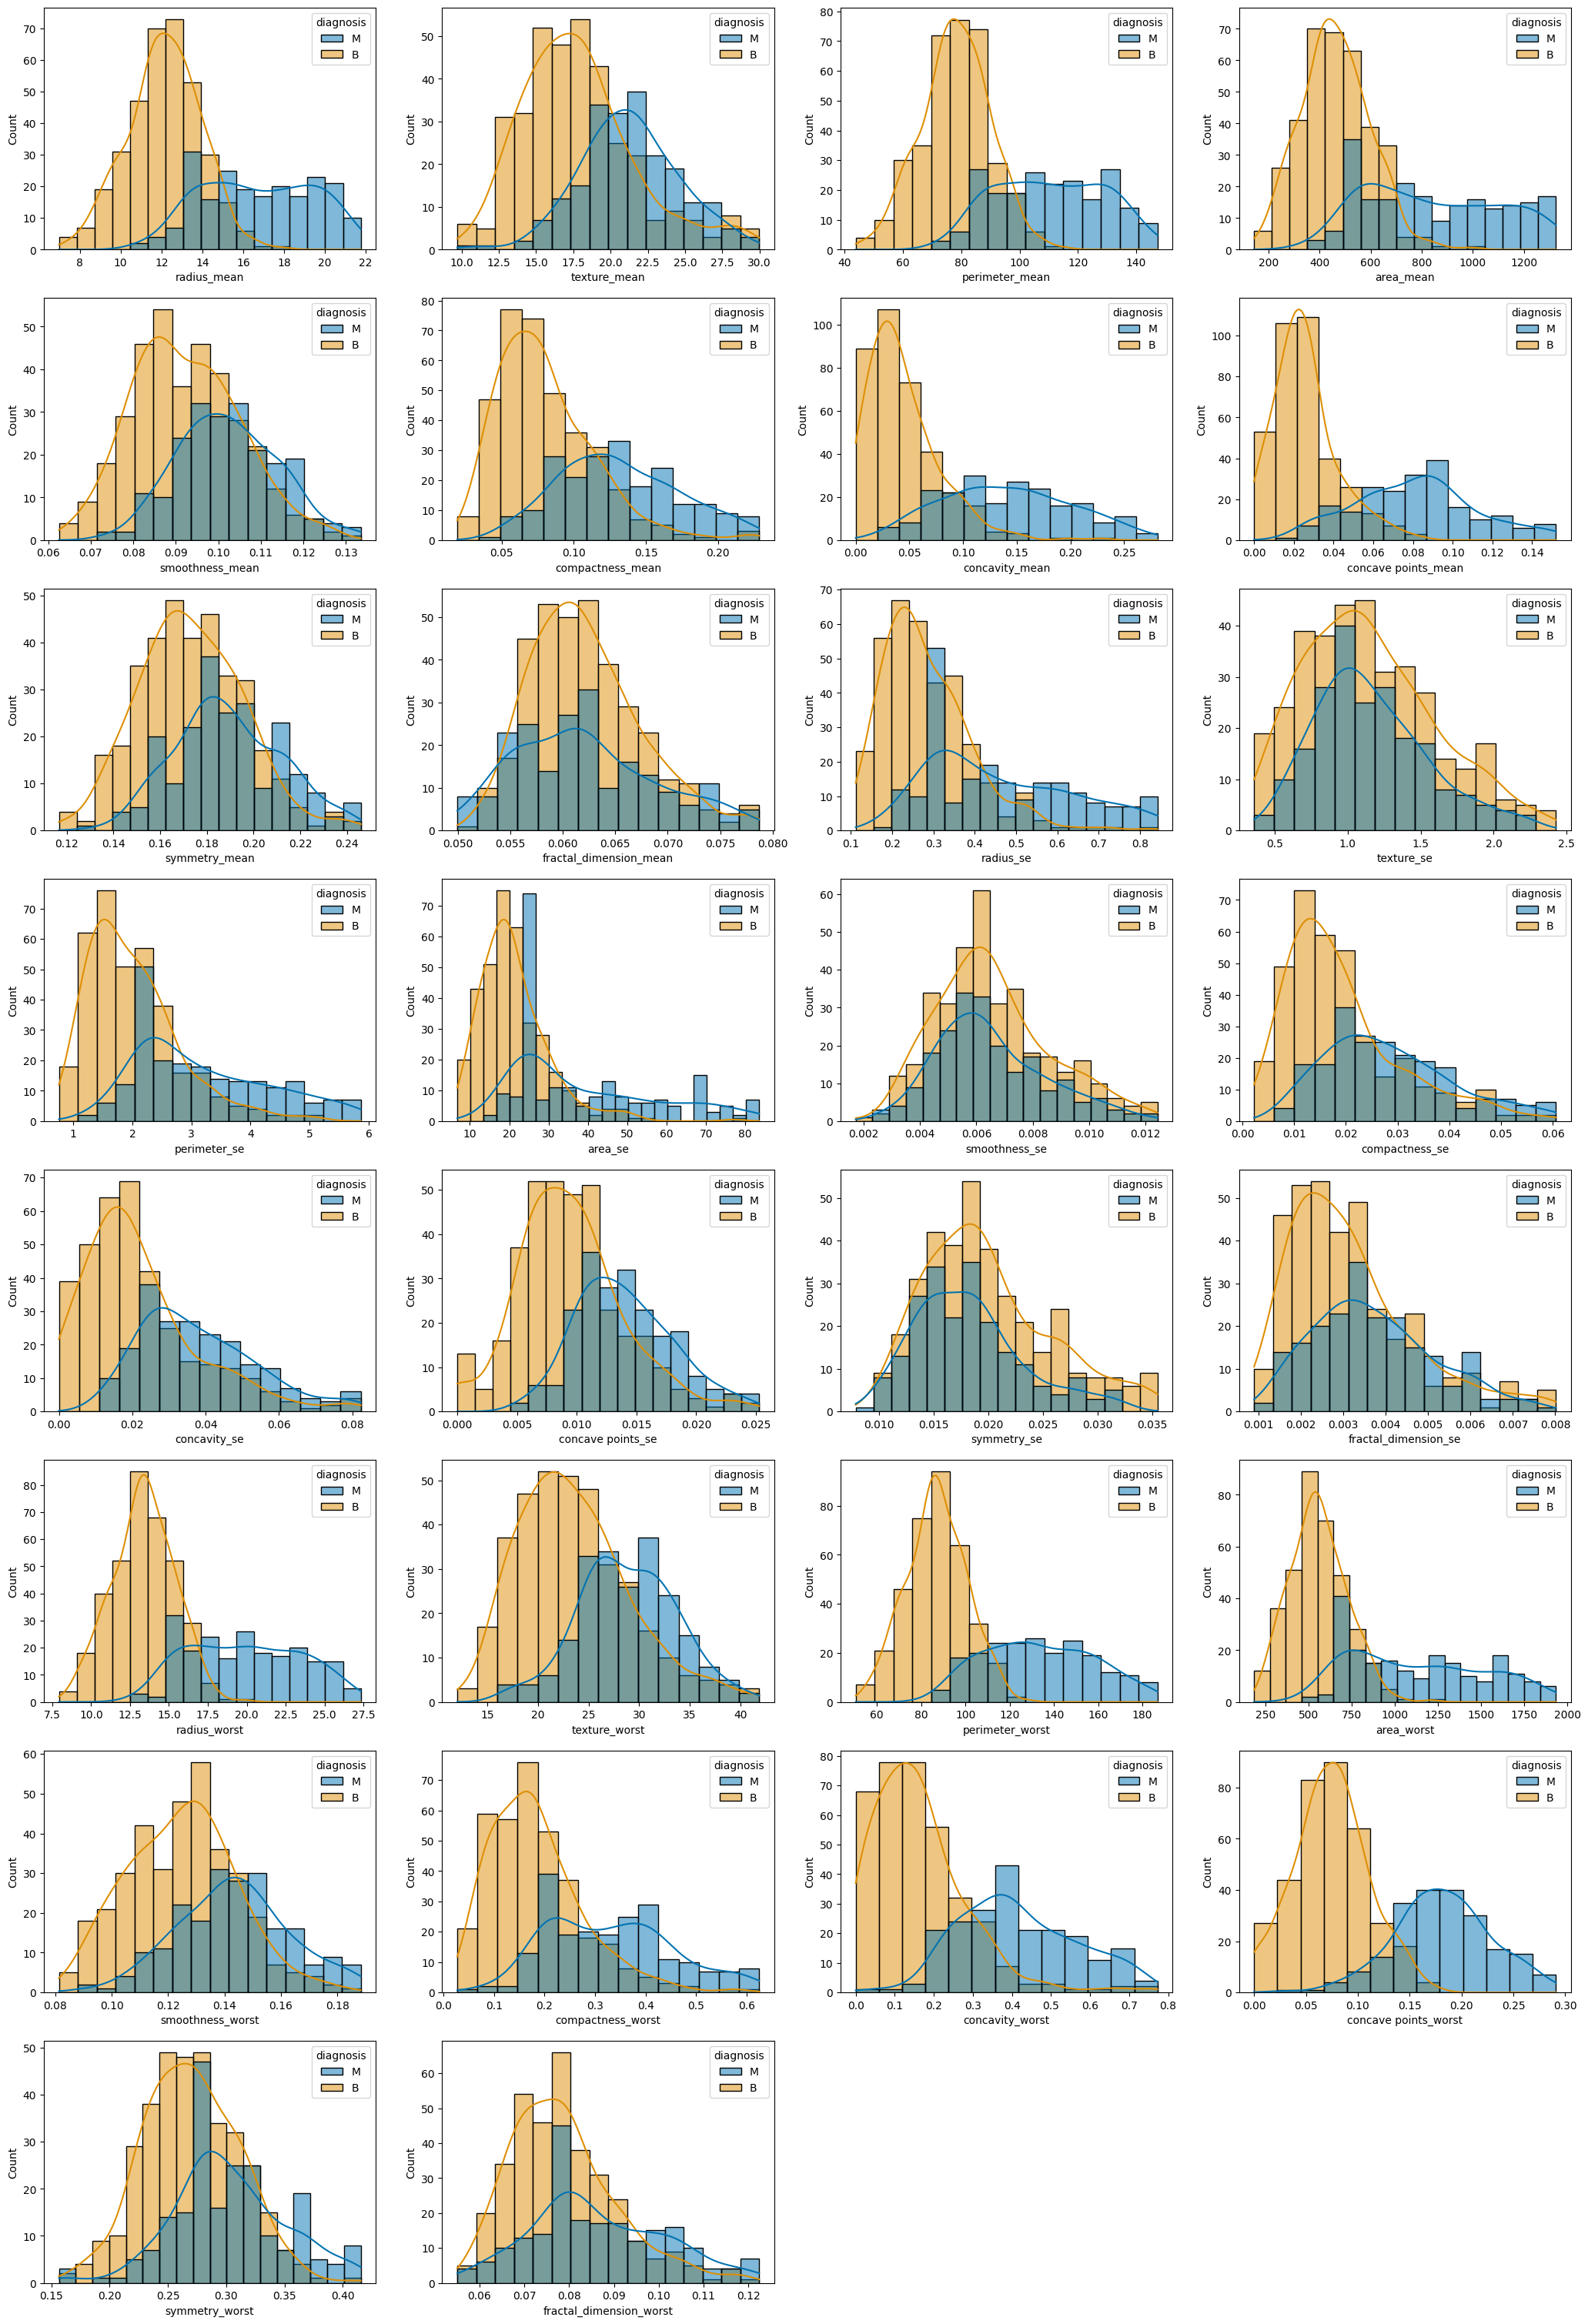

In [118]:
# Verificação da distribuição das variáveis numéricas em relação às classes, desconsiderando outliers (método IQR)
df_iqr = df_raw[num_cols].apply(treat_outliers)
df_iqr = pd.concat([df_iqr, df_raw['diagnosis']], axis=1)
ncols = 4
nrows = int(np.ceil(len(num_cols) / ncols)) 
fig, axes = plt.subplots(figsize=(6.4*ncols, 4.8*nrows),
                         nrows=nrows, ncols=ncols)
axes = axes.flatten()
for col, ax in zip(num_cols, axes):
    sns.histplot(data=df_iqr, x=col, ax=ax, hue='diagnosis', kde=True,
                 palette='colorblind')
    for ax in axes[len(num_cols):]:
        ax.set_axis_off()

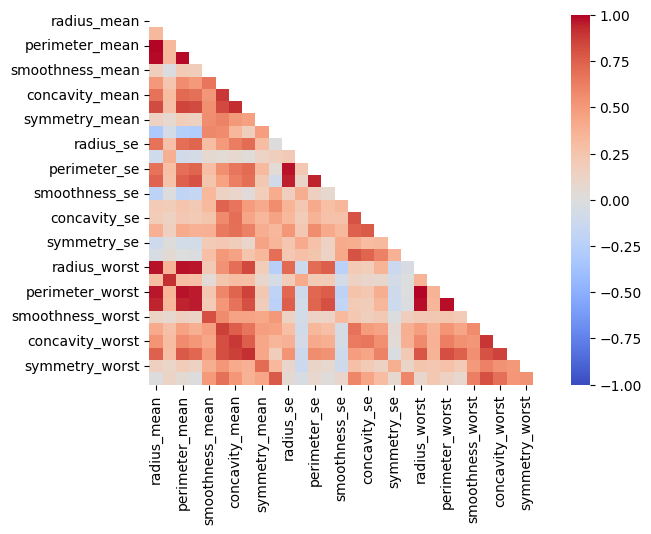

In [127]:
# Correlação entre as variáveis numéricas, Pearson's R
pearson = df_raw[num_cols].corr(method='pearson')
mask = np.triu(np.ones_like(pearson, dtype=bool))
sns.heatmap(pearson, vmin=-1, vmax=1, cmap='coolwarm', mask=mask);

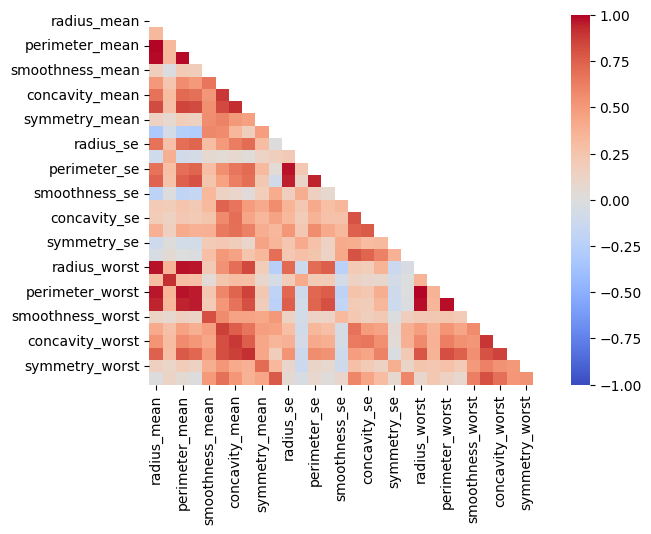

In [128]:
# Correlação entre as variáveis numéricas, Spearmn's rho
spearman = df_raw[num_cols].corr(method='spearman')
mask = np.triu(np.ones_like(spearman, dtype=bool))
sns.heatmap(pearson, vmin=-1, vmax=1, cmap='coolwarm', mask=mask);